# Subspace Digital Twin, Sanity Checking Run

*Danilo Lessa Bernardineli, November 2023*

On this notebook, we do an sanity checking run (which is a single run) so that basic metrics and KPIs
for the simulation are computed.

## Part 1. Dependences & Set-up

Autoreload modules while developing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import panel as pn
import seaborn as sns
import hvplot.pandas
import holoviews as hv
hvplot.extension('plotly')
hv.extension('plotly')

import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = "png" # For GitHub rendering

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

## Part 2. Load Simulation Data

In [3]:
sim_df = pd.read_pickle(
    "../data/simulations/sanity_check_run-2024-01-02_10-16-07.pkl.gz"
)

In [4]:
sim_df.head(5)

days_passed  blocks_passed  circulating_supply  user_supply  \
0             0            0.0            0.000000     0.000000   
14            1        14400.0           13.698630    13.698630   
28            2        28800.0           27.363014    27.363014   
42            3        43200.0           41.319709    41.319777   
56            4        57600.0           55.718919    55.719222   

    issued_supply  total_supply  sum_of_stocks  block_utilization  \
0    0.000000e+00  0.000000e+00   0.000000e+00           0.000000   
14   1.680000e+09  1.680000e+09   3.000000e+09           0.000002   
28   1.680000e+09  1.680000e+09   3.000000e+09           0.000002   
42   1.680000e+09  1.680000e+09   3.000000e+09           0.000002   
56   1.680000e+09  1.680000e+09   3.000000e+09           0.000002   

    dsf_relative_disbursal_per_day  reward_issuance_balance  \
0                              0.0             1.320000e+09   
14                             0.0             1.320000e+09   
28                             0.0             1.320000e+09   
42                             0.0             1.320000e+09   
56                             0.0             1.320000e+09   

    other_issuance_balance  operators_balance  nominators_balance  \
0             1.680000e+09           0.000000            0.000000   
14            1.680000e+09           0.000000            0.000000   
28            1.680000e+09           0.003425            0.003425   
42            1.680000e+09           0.011654            0.011824   
56            1.680000e+09           0.025211            0.025956   

    holders_balance  farmers_balance  staking_pool_balance  fund_balance  \
0          0.000000         0.000000              0.000000      0.000000   
14         0.684932        13.013699              0.000000      0.000000   
28         1.686641        25.669524              0.000000      0.034247   
42         2.850101        38.446131              0.000068      0.118579   
56         4.110654        51.557097              0.000303      0.261084   

    burnt_balance  nominator_pool_shares  operator_pool_shares  block_reward  \
0    0.000000e+00               0.000000              0.000000           NaN   
14   0.000000e+00               0.000000              0.000000     13.698630   
28   0.000000e+00               0.000000              0.000000     13.698630   
42   0.000000e+00               0.000034              0.000034     14.041096   
56   6.506784e-09               0.000152              0.000151     14.541950   

    history_size  space_pledged  allocated_tokens  buffer_size  \
0              0              0               0.0          0.0   
14             0  1572944000000               0.0   97286400.0   
28     268435456  3145888000000               0.0   60355072.0   
42     536870912  4718832000000               0.0   23423744.0   
56     536870912  6291776000000               0.0  120710144.0   

    reference_subsidy  average_base_fee  average_priority_fee  \
0             0.00000               0.0                   0.0   
14           13.69863               1.0                   3.0   
28           13.69863               1.0                   3.0   
42           13.69863               1.0                   3.0   
56           13.69863               1.0                   3.0   

    average_compute_weight_per_tx  average_transaction_size  \
0                             0.0                       256   
14                     60000000.0                       256   
28                     60000000.0                       256   
42                     60000000.0                       256   
56                     60000000.0                       256   

    transaction_count  average_compute_weight_per_bundle  average_bundle_size  \
0                 0.0                                0.0                  0.0   
14            14400.0                                0.0                  0.0   
28            14400.0                       

In [5]:
sim_df.groupby(['run', 'label', 'environmental_label']).size().reset_index(name='Days')

run     label environmental_label  Days
0    1  standard            standard  1097

## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

In [6]:
from subspace_model.experiments.charts import ssc_metrics, aggregate_staking_pool_share_composition, ssc_stock_composition, total_fee_volume_per_day, environmental_processes, blockchain_size, block_utilization
from subspace_model.util import g, get_hex_colors_from_matplotlib_cmap


2024-01-03 20:54:29 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


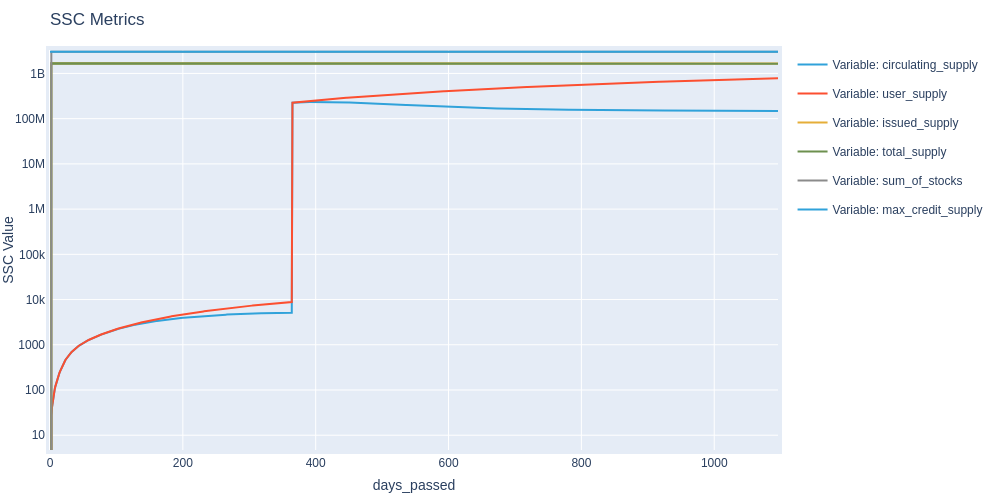

In [7]:
ssc_metrics_chart = ssc_metrics(sim_df, experiment='sanity-check')
g(ssc_metrics_chart)

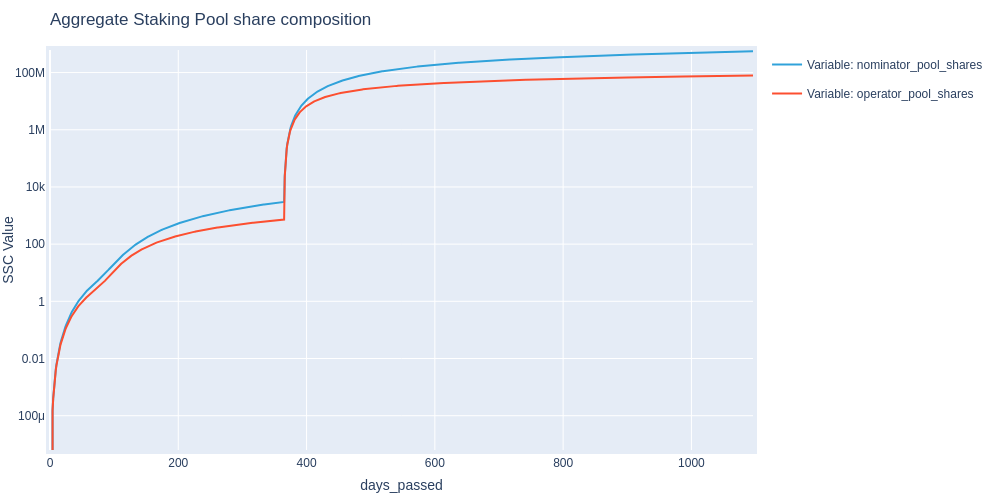

In [8]:
aggregate_staking_pool_share_composition_chart = aggregate_staking_pool_share_composition(sim_df, experiment='sanity-check')
g(aggregate_staking_pool_share_composition_chart)

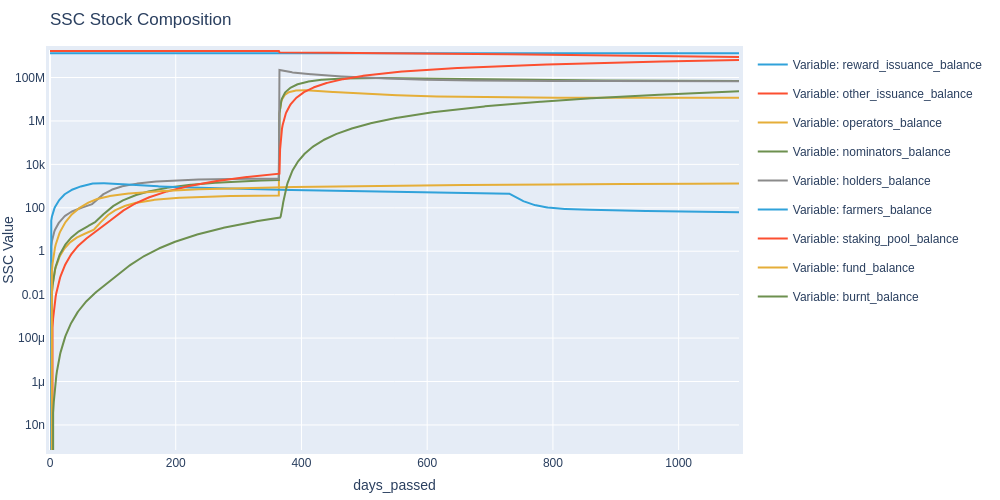

In [9]:
ssc_stock_composition_chart = ssc_stock_composition(sim_df, experiment='sanity-check')
g(ssc_stock_composition_chart)

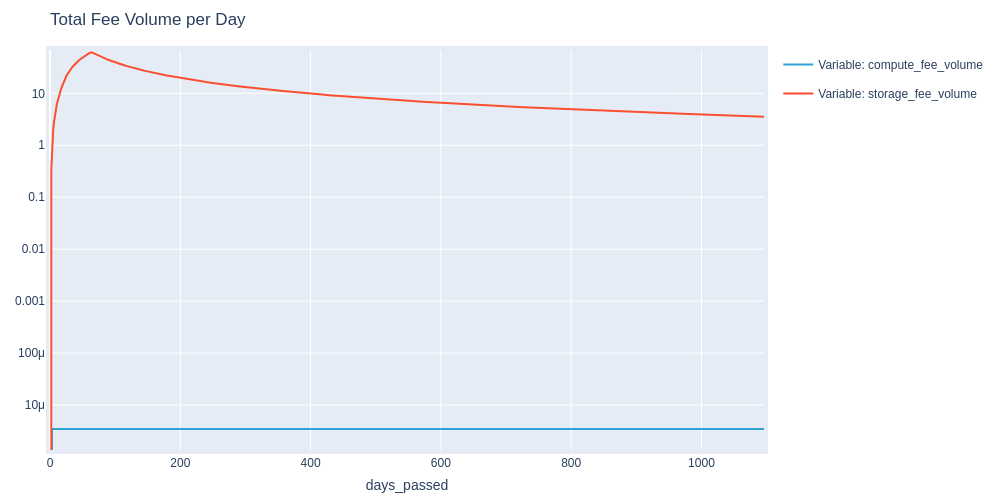

In [10]:
total_fee_volume_per_day_chart = total_fee_volume_per_day(sim_df, experiment='sanity-check')
g(total_fee_volume_per_day_chart)

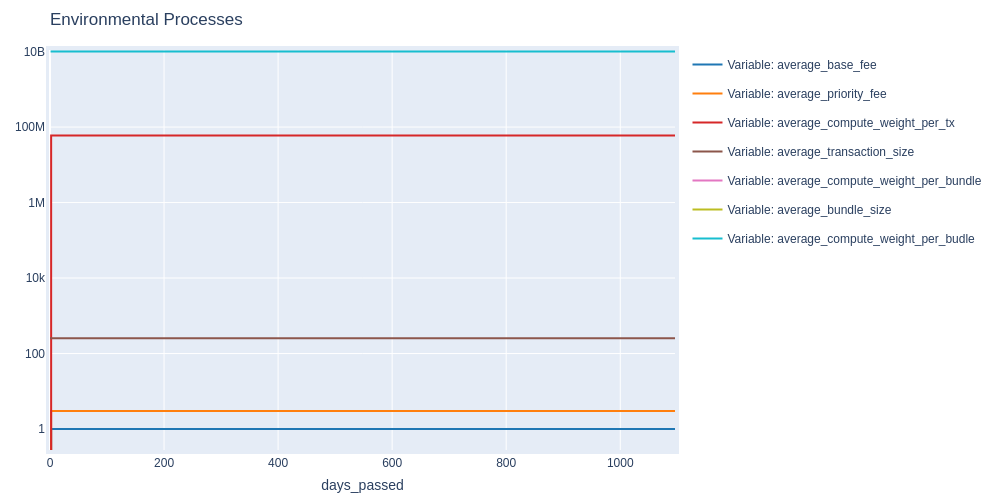

In [11]:
environmental_processes_chart = environmental_processes(sim_df, experiment='sanity-check')
g(environmental_processes_chart)

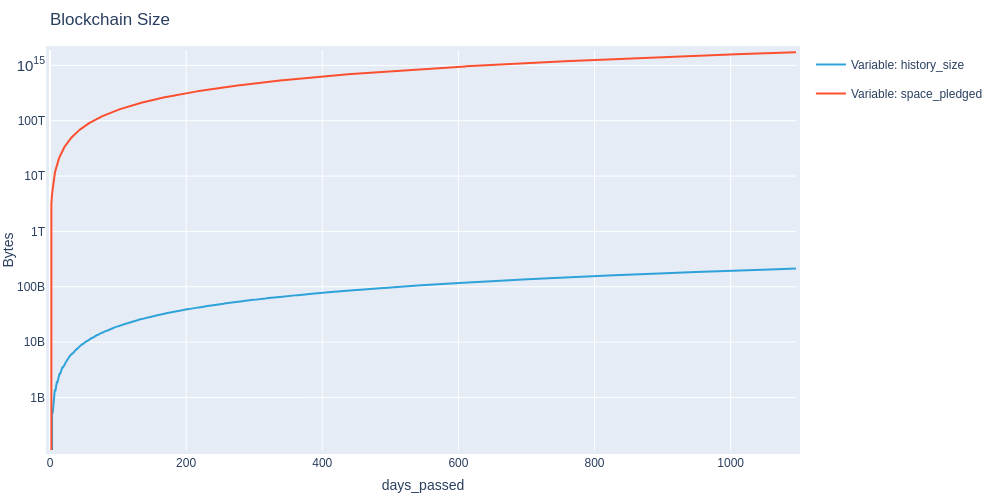

In [12]:
blockchain_size_chart = blockchain_size(sim_df, experiment='sanity-check')
g(blockchain_size_chart)

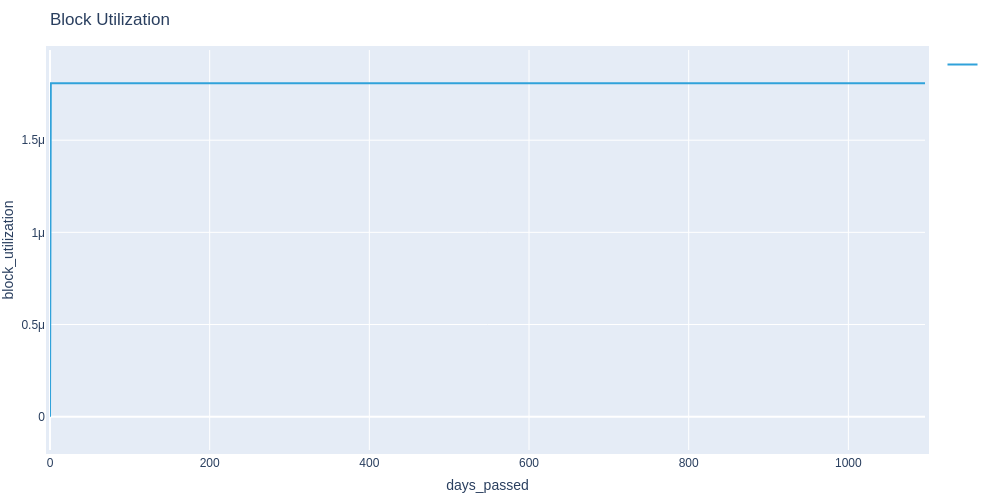

In [13]:
block_utilization_chart = block_utilization(sim_df, experiment='sanity-check')
g(block_utilization_chart)

## Part 4. Scoped KPIs

In [14]:
from subspace_model.experiments.charts import non_negative_profits, negative_profits, holomap_selector_curve, holomap_selector_box, holomap_selector_box, circulating_supply_volatility, weekly_rewards_to_nominators, weekly_issuance_rate, cumulative_issuance_rate

Timestep analysis

### Profit 1 (Inflows[t] - Outflows[t])

In [15]:
from subspace_model.experiments.metrics import profit1_timestep
profit1_timestep_df = profit1_timestep(sim_df)
profit1_timestep_df.head()

profit1_reward_issuance_balance  \
label    environmental_label days_passed                                    
standard standard            0                                   0.000000   
                             1                                 -13.698630   
                             2                                 -13.698630   
                             3                                 -14.041095   
                             4                                 -14.541950   

                                          profit1_other_issuance_balance  \
label    environmental_label days_passed                                   
standard standard            0                                       0.0   
                             1                                       0.0   
                             2                                       0.0   
                             3                                       0.0   
                             4                                       0.0   

                                          profit1_operators_balance  \
label    environmental_label days_passed                              
standard standard            0                             0.000000   
                             1                             0.000000   
                             2                             0.003425   
                             3                             0.008229   
                             4                             0.013557   

                                          profit1_nominators_balance  \
label    environmental_label days_passed                               
standard standard            0                              0.000000   
                             1                              0.000000   
                             2                              0.003425   
                             3                              0.008399   
                             4                              0.014132   

                                          profit1_holders_balance  \
label    environmental_label days_passed                            
standard standard            0                           0.000000   
                             1                           0.684932   
                             2                           1.001709   
                             3                           1.163460   
                             4                           1.260554   

                                          profit1_farmers_balance  \
label    environmental_label days_passed                            
standard standard            0                           0.000000   
                             1                          13.013699   
                             2                          12.655825   
                             3                          12.776607   
                             4                          13.110967   

                                          profit1_staking_pool_balance  \
label    environmental_label days_passed                                 
standard standard            0                                0.000000   
                             1                                0.000000   
                             2                                0.000000   
                             3                                0.000068   
                             4                                0.000235   

                                          profit1_fund_balance  \
label    environmental_label days_passed                         
standard standard            0                        0.000000   
                             1                        0.000000   
                             2                        0.034247   
                             3                        0.084332   
                             4                        0.142505   

                

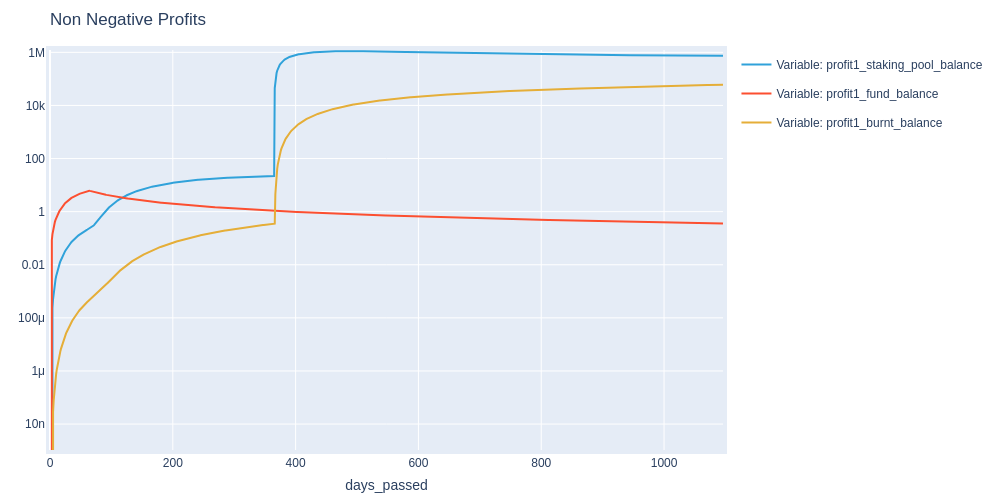

In [16]:
non_negative_profits_chart = non_negative_profits(profit1_timestep_df)
g(non_negative_profits_chart)

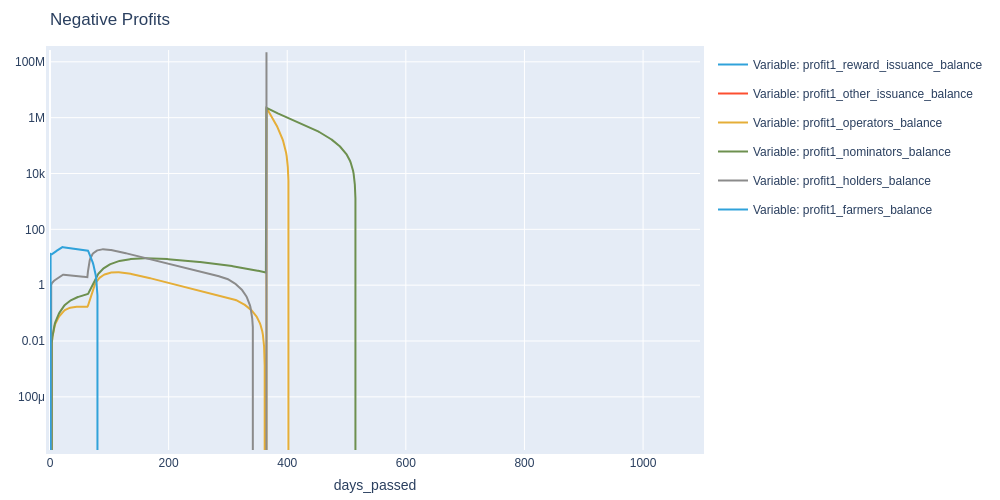

In [17]:
negative_profits_chart = negative_profits(profit1_timestep_df)
g(negative_profits_chart)

Holomap Selector over Profits

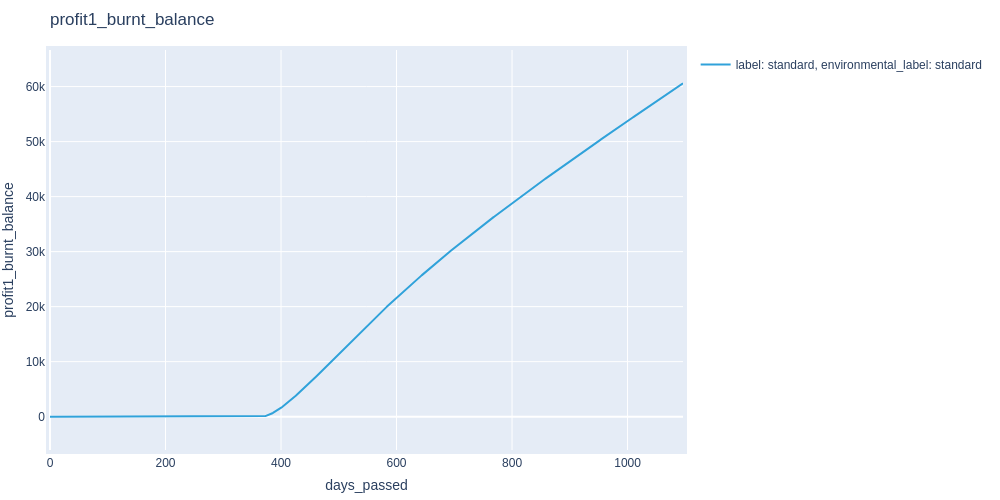

In [18]:
profit1_holomap_curve = holomap_selector_curve(profit1_timestep_df)
g(profit1_holomap_curve)

Grid Layout

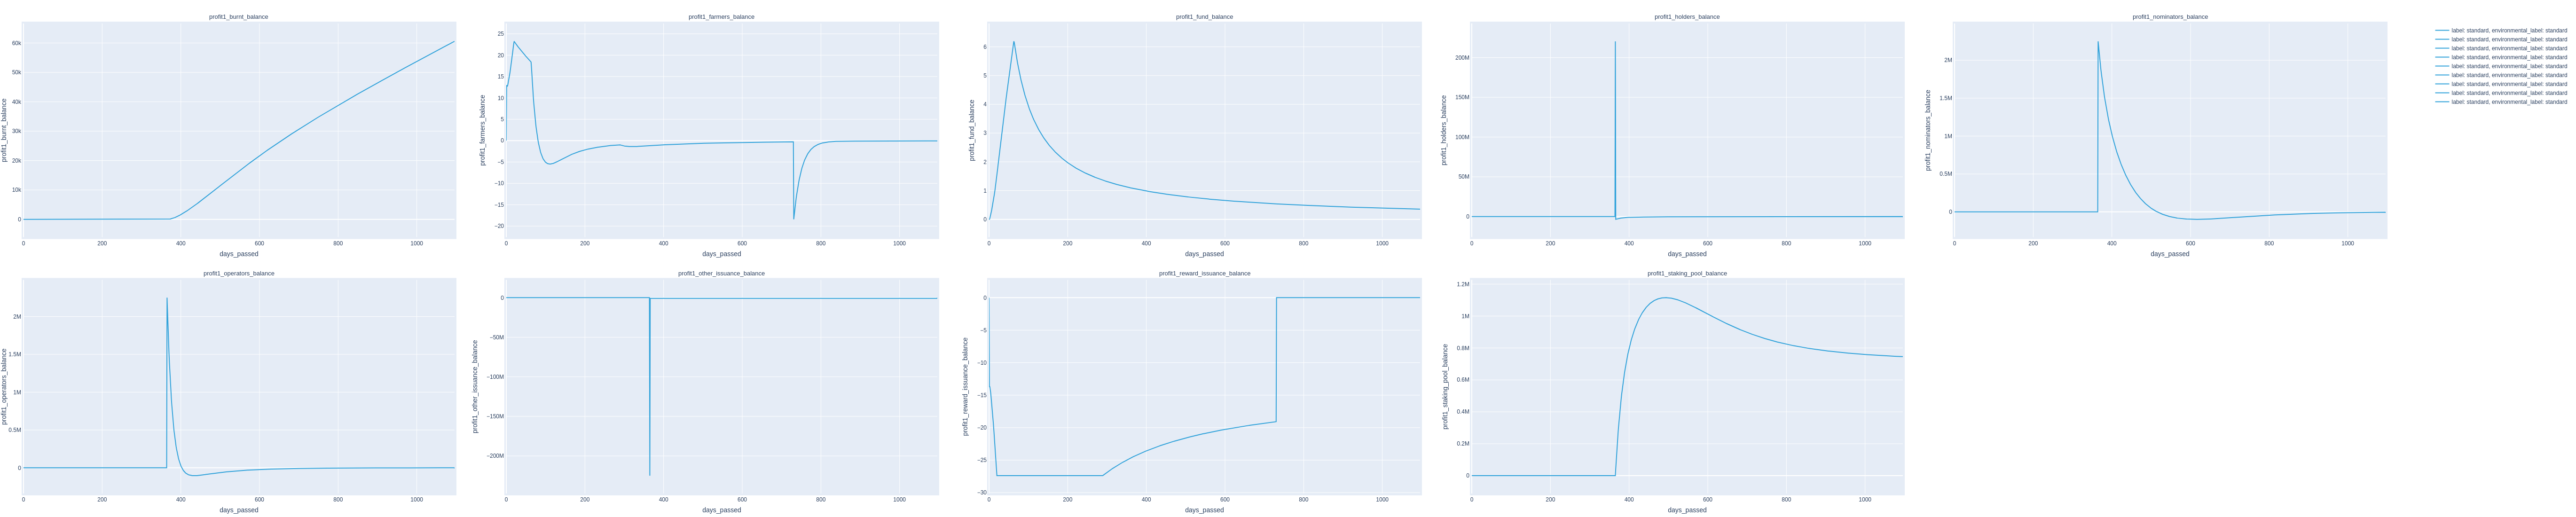

In [19]:
profit1_grid_layout_curve = hv.NdLayout(hv.GridSpace(profit1_holomap_curve)).cols(5)
g(profit1_grid_layout_curve)

Trajectory Analysis

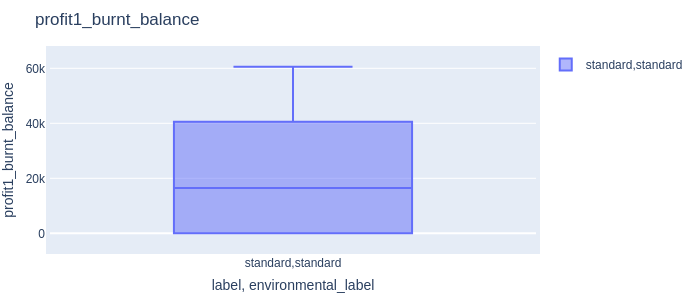

In [20]:
profit1_holomap_box = holomap_selector_box(profit1_timestep_df)
g(profit1_holomap_box)

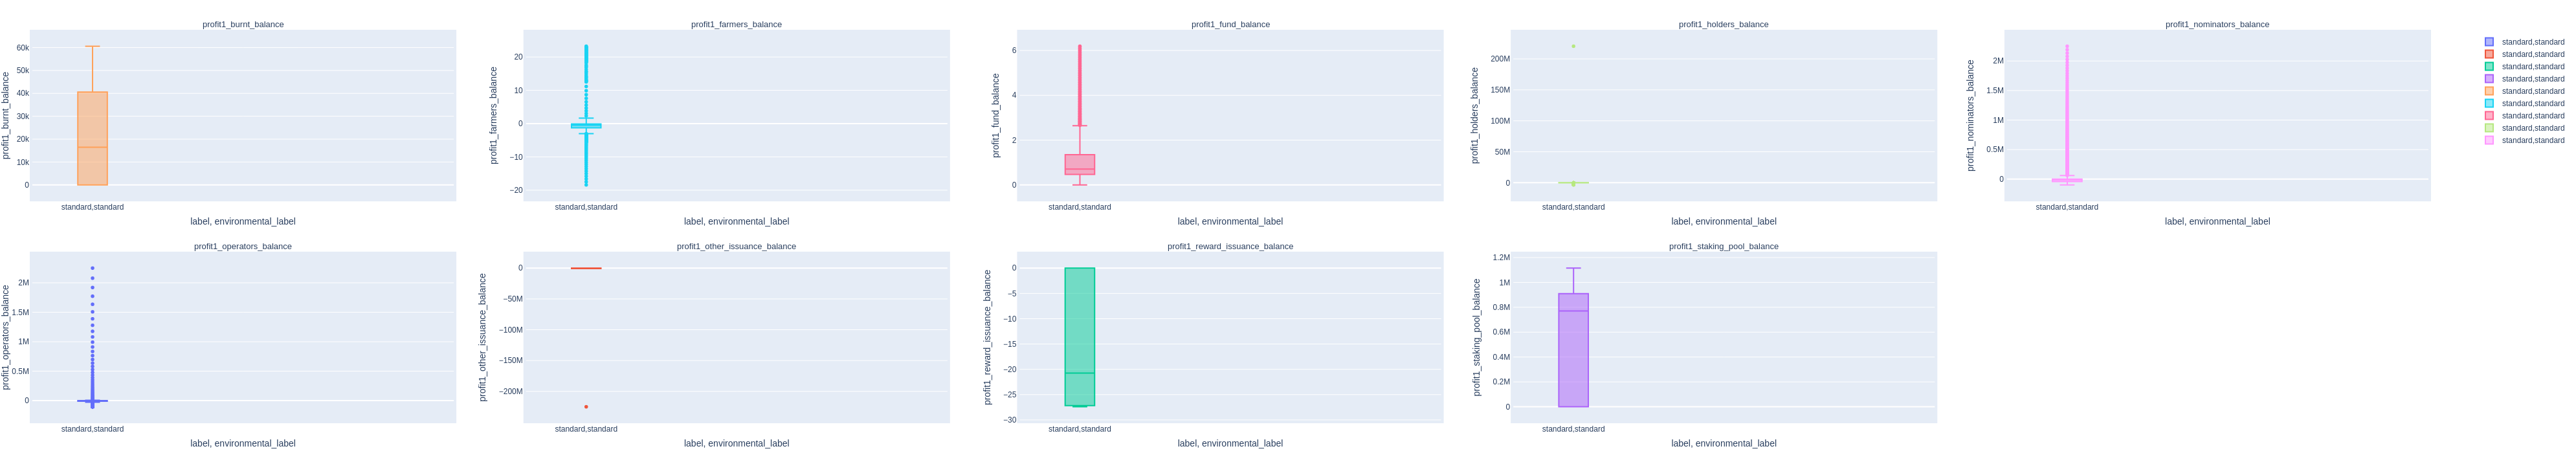

In [21]:
profit1_grid_layout_box = hv.NdLayout(hv.GridSpace(profit1_holomap_box)).cols(5)
g(profit1_grid_layout_box)

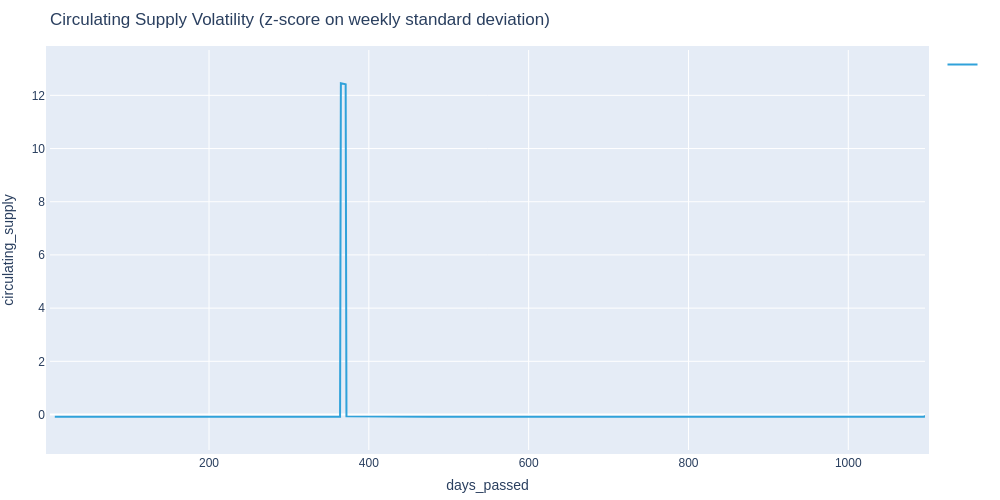

In [22]:
circulating_supply_volatility_chart = circulating_supply_volatility(sim_df, experiment='sanity-check')
g(circulating_supply_volatility_chart)

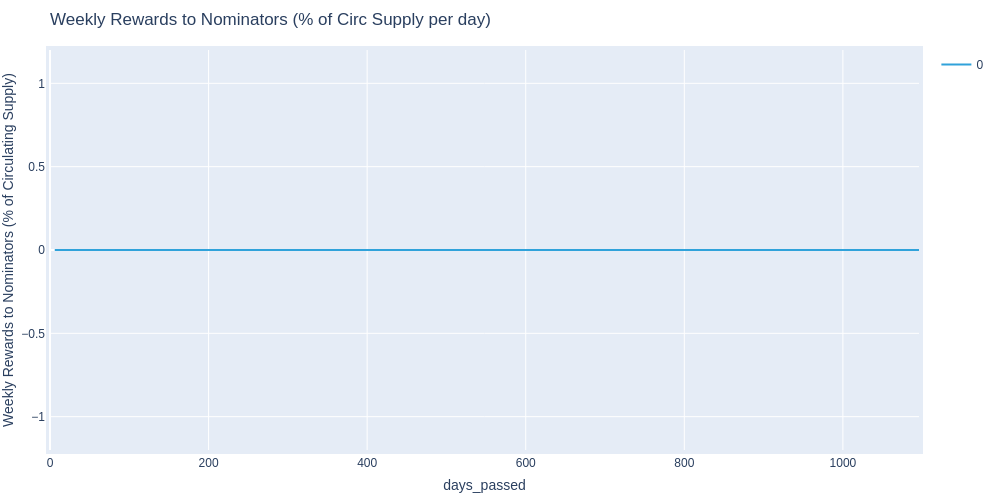

In [23]:
weekly_rewards_to_nominators_chart = weekly_rewards_to_nominators(sim_df, experiment='sanity-check')
g(weekly_rewards_to_nominators_chart)

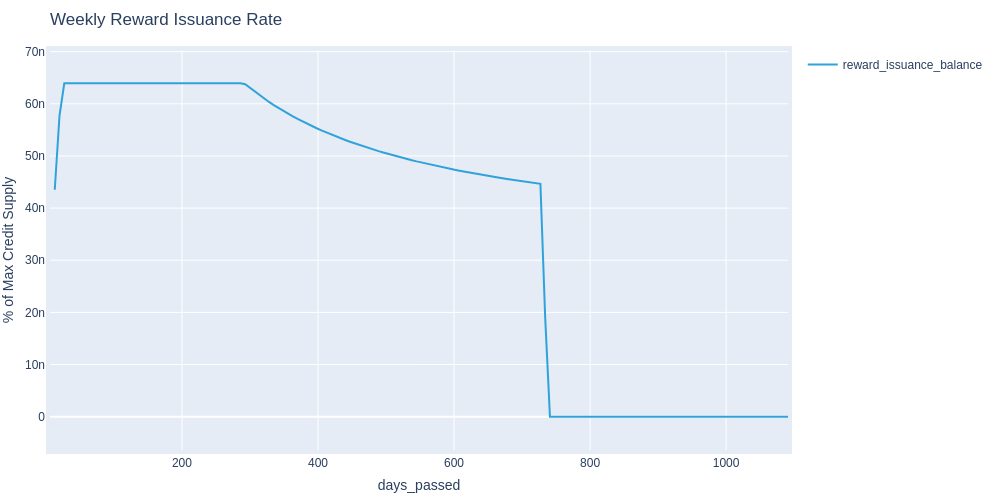

In [24]:
weekly_issuance_rate_chart = weekly_issuance_rate(sim_df, experiment='sanity-check')
g(weekly_issuance_rate_chart)

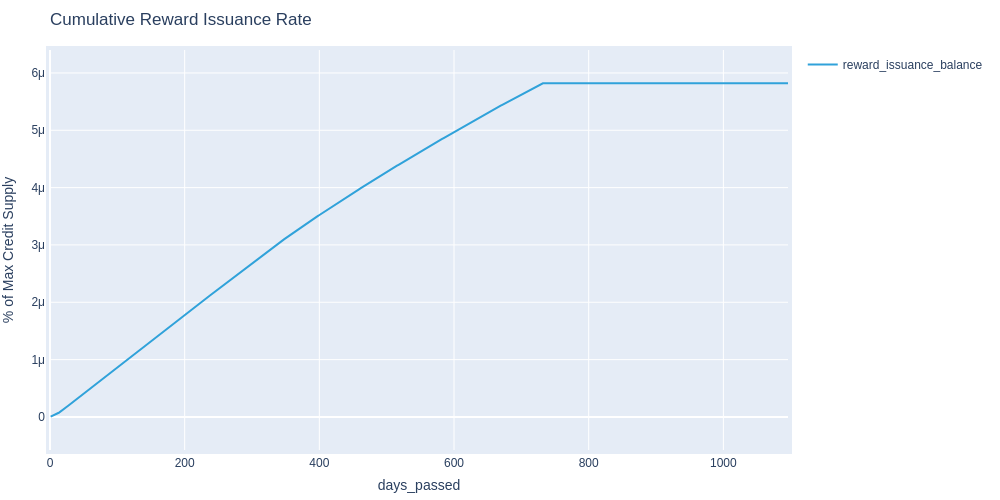

In [25]:
cumulative_issuance_rate_chart = cumulative_issuance_rate(sim_df, experiment='sanity-check')
g(cumulative_issuance_rate_chart)

### Generating Layouts

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
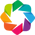

In [26]:
hv.extension('bokeh')

In [27]:
charts1 = [
    ssc_metrics_chart,
    aggregate_staking_pool_share_composition_chart, 
    ssc_stock_composition_chart,
    total_fee_volume_per_day_chart,
    environmental_processes_chart,
    blockchain_size_chart, 
    block_utilization_chart, 
    non_negative_profits_chart,
    negative_profits_chart,
    circulating_supply_volatility_chart,
    circulating_supply_volatility_chart,
    weekly_rewards_to_nominators_chart,
    weekly_issuance_rate_chart,
    cumulative_issuance_rate_chart,
]

layout1 = hv.Layout(charts1).opts(shared_axes=False).cols(3) 
# hv.save(layout1, 'metrics1.png', fmt='png')
layout1

:Layout
   .NdOverlay.I                      :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.II                     :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.III                    :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.IV                     :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.V                      :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.VI                     :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .Curve.I                          :Curve   [days_passed]   (block_utilization)
   .NdOverlay.VII                    :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .NdOverlay.VIII                   :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)
   .Curve.II                         :Curve   [days_passed]   (circulating_supply)
   .Curve.III                        :Curve   [days_passed]   (circulating_supply)
   .Curve.A_0                        :Curve   [days_passed]   (0)
   .Curve.Reward_issuance_balance.I  :Curve   [days_passed]   (reward_issuance_balance)
   .Curve.Reward_issuance_balance.II :Curve   [days_passed]   (reward_issuance_balance)

In [28]:
charts2 = [ 
    profit1_grid_layout_curve,
    profit1_grid_layout_box,
]

layout2 = hv.Layout(charts2).opts(shared_axes=False).cols(1) 
# hv.save(layout2, 'metrics2.png', fmt='png')
layout2

:Layout
   .NdLayout.I  :NdLayout   [Default]
      :NdOverlay   [label,environmental_label]
         :Curve   [days_passed]   (profit1_staking_pool_balance)
   .NdLayout.II :NdLayout   [Default]
      :BoxWhisker   [label,environmental_label]   (profit1_staking_pool_balance)

### Normalized Perspectives

In [29]:
df = sim_df.set_index('days_passed').bfill().fillna(0)

# Take numeric columns for normalizationn
df_numeric = df.select_dtypes(include=['number'])

# Create the normalized results
df_normalized = df_numeric / df_numeric.max()

# Add the label column back
df_normalized[['label', 'environmental_label']] = df[['label', 'environmental_label']]

# Drop unecessary columns
df_normalized = df_normalized.drop(['run', 'timestep', 'simulation', 'subset', 'timestep_in_days', 'block_time_in_seconds', 'sum_of_stocks', 'buffer_size'], axis=1)
df_normalized.shape

(1097, 40)

In [30]:
df_normalized_chart = df_normalized.hvplot.line(x='days_passed', by=['label', 'environmental_label'], title="Normalized Numeric Outcomes", width=2000, height=1000, line_width=2, ylim=(0,1))
# hv.save(df_normalized_chart, 'df_normalized_chart.png', fmt='png')
df_normalized_chart

:NdOverlay   [Variable]
   :Curve   [days_passed]   (value)